In [24]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Input

import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Scaling. Siccome sono grayscale, valori tra 0 e 255, vogliamo portarli tra 0 e 1
x_train = x_train / 255.0 

In [5]:
x_test = x_test / 255.0

In [7]:
x_train.shape

(60000, 28, 28)

In [21]:
model = Sequential()
model.add(Input(x_train.shape[1:]))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(x_test.shape[1], activation="softmax"))

In [22]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8193 - loss: 0.6607 - val_accuracy: 0.9522 - val_loss: 0.1673
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9458 - loss: 0.1862 - val_accuracy: 0.9646 - val_loss: 0.1222
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9617 - loss: 0.1297 - val_accuracy: 0.9719 - val_loss: 0.0956
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9687 - loss: 0.1050 - val_accuracy: 0.9722 - val_loss: 0.0889
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0872 - val_accuracy: 0.9777 - val_loss: 0.0762
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9774 - loss: 0.0738 - val_accuracy: 0.9789 - val_loss: 0.0741
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9801 - loss: 0.0671 - val_accuracy: 0.9770 - val_loss: 0.0765
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9811 - loss: 0.0588 - val_accuracy: 0.

In [19]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.9782 - loss: 0.0822


[0.06982765346765518, 0.9810000061988831]

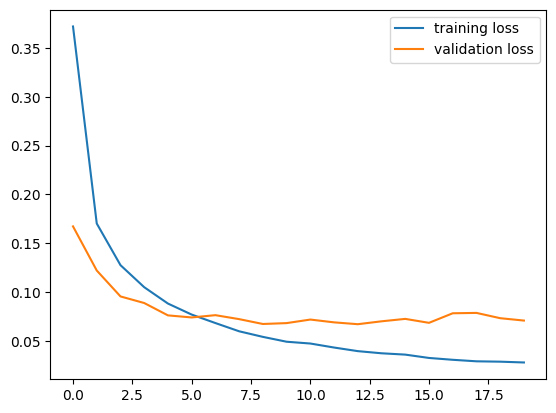

In [25]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()

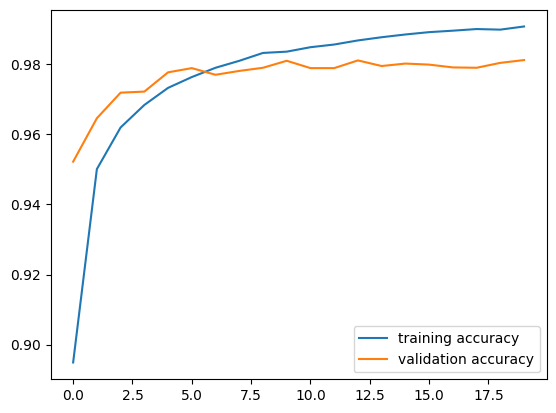

In [26]:
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
Confusion matrix, without normalization
[[ 971    1    1    2    0    1    1    1    2    0]
 [   0 1126    3    1    0    0    2    0    3    0]
 [   4    3 1010    1    1    0    3    7    3    0]
 [   0    0    1  993    0    4    0    5    2    5]
 [   1    0    1    0  958    0    7    1    2   12]
 [   3    0    0    8    0  873    2    2    1    3]
 [   4    3    0    1    3    4  942    0    1    0]
 [   2    5    6    2    1    0    0 1006    0    6]
 [   2    0    2    5    5    4    0    3  948    5]
 [   2    2    0    3    6    6    1    3    1  985]]


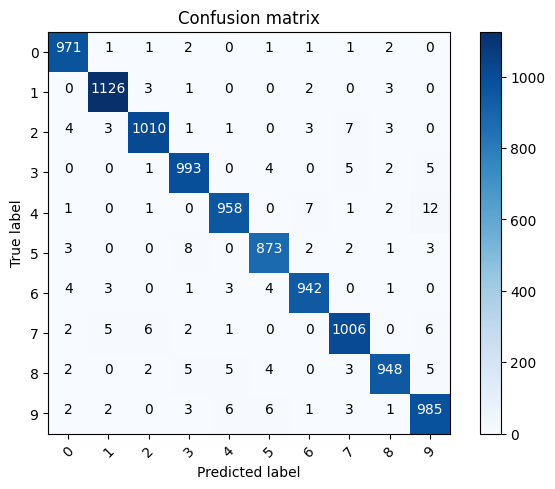

In [32]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'This was a 8 predicted as 4')

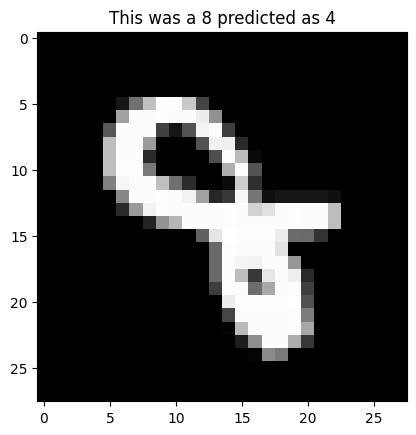

In [46]:
# Proviamo a predire e plottare un esempio sbagliato
example_idx = np.where(p_test != y_test)[0]
i = np.random.choice(example_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title(f"This was a {y_test[i]} predicted as {p_test[i]}")